<a href="https://colab.research.google.com/github/Hero0963/dscamp_prediction-of-quality-of-wine/blob/main/dscamp_lv2_prediction_of_quality_of_wine_nn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#專題實作 #02：紅酒品質分類預測 - 神經網路模型

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [ ]:
features = df.drop('quality', axis=1)
labels = df['quality']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = features
y = labels

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.148794
9              sulphates    0.109071
6   total sulfur dioxide    0.105674
1       volatile acidity    0.103327
7                density    0.091802
4              chlorides    0.080368
2            citric acid    0.074700
0          fixed acidity    0.073976
8                     pH    0.072816
3         residual sugar    0.072764
5    free sulfur dioxide    0.066706


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化
scaler = StandardScaler()
features_normalized_standardized  = features.copy()
features_normalized_standardized = scaler.fit_transform(features_normalized_standardized)

# 最小最大化正規化
scaler = MinMaxScaler()
features_normalized__minmax  = features.copy()
features_normalized__minmax =  scaler.fit_transform(features_normalized__minmax)


display(features_normalized_standardized)
display(features_normalized__minmax)

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [ ]:
features_normalized_standardized = pd.DataFrame(features_normalized_standardized, columns=features.columns)
print(type(features_normalized_standardized))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.cluster import KMeans

# 選擇特徵子集
excluded_features = ['residual sugar', 'free sulfur dioxide']
selected_features = [f for f in features.columns if f not in excluded_features]

# 資料預處理

# 假設你的資料集為 df，進行特徵縮放等必要的預處理步驟


n_clusters = len(df['quality'].unique())

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_normalized_standardized[selected_features].values)

# 獲取聚類結果
cluster_labels = kmeans.labels_

# 新特徵的命名
new_feature_name = 'cluster_label'

# 將聚類結果作為新特徵添加到原始資料集
features_normalized_standardized[new_feature_name] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
excluded_features = ['residual sugar', 'free sulfur dioxide', 'cluster_label']
selected_features = [f for f in features.columns if f not in excluded_features]

X = features_normalized_standardized[selected_features]
y = labels

In [ ]:
display(labels)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
display(type(labels))

pandas.core.series.Series

In [ ]:
print(labels.unique())

[5 6 7 4 8 3]


In [ ]:
def convert_label(value):
    if value <= 6.5:
        return "bad"
    else:
        return "good"

converted_labels = labels.apply(convert_label)
print(converted_labels)

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
converted_labels = label_quality.fit_transform(converted_labels)
display(converted_labels)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X = features_normalized_standardized[selected_features]
y = converted_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43, stratify=y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.92776524 0.94343891 0.93665158 0.93438914 0.9321267 ]


#NN Model

嘗試調整 model參數
隱藏層的數量和尺寸。
使用了 torch.tanh() 作為第一個隱藏層的激活函數。
使用了 torch.dropout() 層進行正則化，
並在每個隱藏層的輸出上應用了 dropout。
在預測層使用了 torch.sigmoid() 作為激活函數。




In [ ]:
import torch
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, 64)
        self.hidden2 = torch.nn.Linear(64, 32)
        self.predict = torch.nn.Linear(32, output_size)

    def forward(self, x):
        output1 = torch.relu(self.hidden1(x))
        output2 = torch.relu(self.hidden2(output1))
        output = torch.sigmoid(self.predict(output2))
        return output


In [ ]:
# 模型、優化器初始化
model = Model(X_test.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.BCELoss()


# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32)
y_data = torch.tensor(np.expand_dims(y_train, axis=1), dtype=torch.float32)

x_val_data = torch.tensor(X_val.values, dtype=torch.float32)
y_val_data = torch.tensor(np.expand_dims(y_val, axis=1), dtype=torch.float32)

x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_test_data = torch.tensor(np.expand_dims(y_test, axis=1), dtype=torch.float32)


batch_size = 32
num_epochs = 200

training_losses = []
val_losses = []

for epoch in range(num_epochs):
    for i in range(0, len(x_data), batch_size):
        prediction = model(x_data[i:i+batch_size])
        loss = loss_func(prediction, y_data[i:i+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    training_losses.append(float(loss))

    y_pred = model(x_val_data)
    val_loss = loss_func(y_pred, y_val_data)
    print("training loss:{}, val loss:{}, val acc:{}".format(float(loss), val_loss, accuracy_score(y_val_data, np.where(y_pred >= 0.5, 1, 0))))

    val_losses.append(float(val_loss))

training loss:0.6304767727851868, val loss:0.6197344660758972, val acc:0.7792792792792793
training loss:0.5115633010864258, val loss:0.47867950797080994, val acc:0.8108108108108109
training loss:0.4487811326980591, val loss:0.39381372928619385, val acc:0.8198198198198198
training loss:0.4303429126739502, val loss:0.3639771342277527, val acc:0.8288288288288288
training loss:0.4201667010784149, val loss:0.35028406977653503, val acc:0.8378378378378378
training loss:0.4122423231601715, val loss:0.3414023816585541, val acc:0.8378378378378378
training loss:0.4053502380847931, val loss:0.3348842263221741, val acc:0.8288288288288288
training loss:0.3991234302520752, val loss:0.3294846713542938, val acc:0.8333333333333334
training loss:0.39321720600128174, val loss:0.3249180316925049, val acc:0.8468468468468469
training loss:0.38764074444770813, val loss:0.3210147023200989, val acc:0.8513513513513513
training loss:0.38229531049728394, val loss:0.31730252504348755, val acc:0.8603603603603603
tra

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model(x_test_data)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       277
           1       0.88      0.98      0.93       276

    accuracy                           0.92       553
   macro avg       0.93      0.92      0.92       553
weighted avg       0.93      0.92      0.92       553



Text(0, 0.5, 'loss')

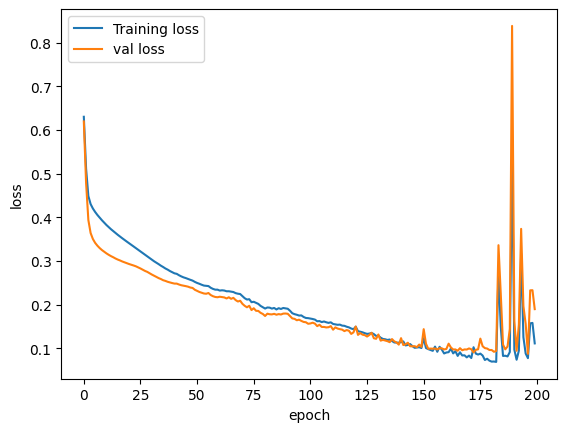

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_losses)
plt.plot(val_losses)
plt.legend(("Training loss", "val loss"))
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# 創建Oversampling的實例
# 隨機過採樣（Random Over Sampling）
ros = RandomOverSampler(random_state=42)

# SMOTE過採樣（Synthetic Minority Over-sampling Technique）
smote = SMOTE(random_state=42)

# 使用Oversampling方法處理不平衡數據集
X_ros, y_ros = ros.fit_resample(X, y)  # 使用Random Over Sampling
X_smote, y_smote = smote.fit_resample(X, y)  # 使用SMOTE

# X_ros 和 y_ros 是經過Random Over Sampling後的新數據集
# X_smote 和 y_smote 是經過SMOTE過採樣後的新數據集

In [ ]:
X = X_smote
y = y_smote


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43, stratify=y_train)

In [ ]:
# 模型、優化器初始化
model = Model(X_test.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.BCELoss()


# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32)
y_data = torch.tensor(np.expand_dims(y_train, axis=1), dtype=torch.float32)

x_val_data = torch.tensor(X_val.values, dtype=torch.float32)
y_val_data = torch.tensor(np.expand_dims(y_val, axis=1), dtype=torch.float32)

x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_test_data = torch.tensor(np.expand_dims(y_test, axis=1), dtype=torch.float32)


batch_size = 32
num_epochs = 200

training_losses = []
val_losses = []

for epoch in range(num_epochs):
    for i in range(0, len(x_data), batch_size):
        prediction = model(x_data[i:i+batch_size])
        loss = loss_func(prediction, y_data[i:i+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    training_losses.append(float(loss))

    y_pred = model(x_val_data)
    val_loss = loss_func(y_pred, y_val_data)
    print("training loss:{}, val loss:{}, val acc:{}".format(float(loss), val_loss, accuracy_score(y_val_data, np.where(y_pred >= 0.5, 1, 0))))

    val_losses.append(float(val_loss))

training loss:0.636477530002594, val loss:0.6299139261245728, val acc:0.6846846846846847
training loss:0.5452790260314941, val loss:0.523941159248352, val acc:0.7927927927927928
training loss:0.4777064323425293, val loss:0.43893200159072876, val acc:0.8153153153153153
training loss:0.44638535380363464, val loss:0.39276647567749023, val acc:0.8333333333333334
training loss:0.4308765232563019, val loss:0.3697564899921417, val acc:0.8243243243243243
training loss:0.4201442301273346, val loss:0.3561188280582428, val acc:0.8243243243243243
training loss:0.41116854548454285, val loss:0.34689778089523315, val acc:0.8333333333333334
training loss:0.4026791751384735, val loss:0.34000980854034424, val acc:0.8378378378378378
training loss:0.3947279155254364, val loss:0.33480656147003174, val acc:0.8378378378378378
training loss:0.3873613178730011, val loss:0.33051374554634094, val acc:0.8558558558558559
training loss:0.3804435729980469, val loss:0.3263680636882782, val acc:0.8558558558558559
trai

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model(x_test_data)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       277
           1       0.88      0.98      0.93       276

    accuracy                           0.92       553
   macro avg       0.93      0.92      0.92       553
weighted avg       0.93      0.92      0.92       553



Text(0, 0.5, 'loss')

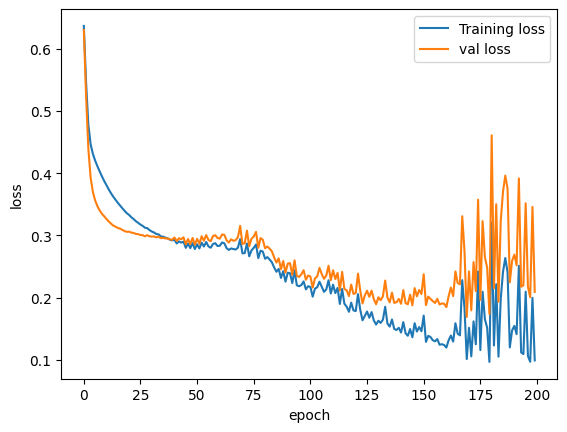

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_losses)
plt.plot(val_losses)
plt.legend(("Training loss", "val loss"))
plt.xlabel("epoch")
plt.ylabel("loss")